# Practico 4 - Generacion de variables aleatorias discretas

In [19]:
from random import random
import numpy as np 
import time

## Ejercicio 2

In [20]:
# a)

def calc_sum_exp(N):
    sum = 0
    for k in range(1, N + 1):
        sum += np.exp(k/N)
    return sum

res_a = calc_sum_exp(10000)
print("Resultado de la suma:", res_a)

Resultado de la suma: 17183.677439823703


In [21]:
# b) 
def calc_sum_exp_promedio(M, N):
    sum = 0 
    for _ in range(M):
        x = np.random.uniform(1, N)
        sum += np.exp(x/N)
    return N * sum / M

res_b = calc_sum_exp_promedio(100, 10000)
print("Resultado de la suma promedio:", res_b)

Resultado de la suma promedio: 17567.940256216687


In [22]:
# c)

start = time.time()
exacta = calc_sum_exp(100)
end = time.time()
print("Exacta:", exacta, "Tiempo:", end - start)

start = time.time()
aprox = calc_sum_exp_promedio(100, 100)
end = time.time()
print("Aproximación:", aprox, "Tiempo", end - start)

Exacta: 172.68875565927127 Tiempo: 0.0005369186401367188
Aproximación: 176.2689089707529 Tiempo 0.0010814666748046875


## Ejercicio 3

In [23]:
# a)

def dados():
    combinaciones = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    iteraciones = 0
    while len(combinaciones) > 0:
        d1 = np.random.randint(1, 7)
        d2 = np.random.randint(1, 7)
        suma = d1 + d2
        iteraciones += 1
        if suma in combinaciones:
            combinaciones.remove(suma)
            
    return iteraciones
            
dados()

65

In [24]:
# b) i)

def simular_repeticiones(n_repeticiones):
    resultados = [dados() for _ in range(n_repeticiones)]
    media = np.mean(resultados)
    desv_std = np.std(resultados, ddof=1)  # muestra (no poblacional)
    return media, desv_std

# Repeticiones solicitadas
repeticiones = [100, 1000, 10000, 100000]

for n in repeticiones:
    media, desviacion = simular_repeticiones(n)
    print(f"Repeticiones: {n}")
    print(f"Media estimada de lanzamientos: {media:.4f}")
    print(f"Desviación estándar estimada: {desviacion:.4f}\n")

Repeticiones: 100
Media estimada de lanzamientos: 64.7800
Desviación estándar estimada: 44.2937

Repeticiones: 1000
Media estimada de lanzamientos: 61.7850
Desviación estándar estimada: 37.2518

Repeticiones: 10000
Media estimada de lanzamientos: 61.1339
Desviación estándar estimada: 35.4547

Repeticiones: 100000
Media estimada de lanzamientos: 61.2968
Desviación estándar estimada: 36.1110



In [25]:
# b) ii)

def estimar_probabilidades(n_repeticiones):
    resultados = [dados() for _ in range(n_repeticiones)]
    resultados = np.array(resultados)

    p_ge_15 = np.mean(resultados >= 15)
    p_le_9 = np.mean(resultados <= 9)

    return p_ge_15, p_le_9

# Repeticiones solicitadas
repeticiones = [100, 1000, 10000, 100000]

for n in repeticiones:
    p_ge_15, p_le_9 = estimar_probabilidades(n)
    print(f"Repeticiones: {n}")
    print(f"P(N ≥ 15): {p_ge_15:.4f}")
    print(f"P(N ≤ 9): {p_le_9:.4f}\n")


Repeticiones: 100
P(N ≥ 15): 0.9900
P(N ≤ 9): 0.0000

Repeticiones: 1000
P(N ≥ 15): 0.9990
P(N ≤ 9): 0.0000

Repeticiones: 10000
P(N ≥ 15): 0.9988
P(N ≤ 9): 0.0000

Repeticiones: 100000
P(N ≥ 15): 0.9988
P(N ≤ 9): 0.0000



## Ejercicio 4

In [26]:
# a) Metodo de rechazo con c mas bajo posible

# Calculamos c=1.4

# arreglos de valores
valores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
probsX = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
probsY = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

def UniformeY(n):
    u = random()
    x = 1; F = 1/n
    while u >= F:
        F += 1/n
        x += 1
    return x

def AyR1(c=1.4):
    while True:
        y = UniformeY(10)
        u = random()
        if u < probsX[y-1] / (c * probsY[y-1]):
            return y

In [27]:
# MEtodo de transformada inversa

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
p = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
# E[cantidad de comparaciones] = 
# 1*0.11 + 2*0.14 + 3*0.09 + 4*0.08 + 5*0.12 + 6*0.10 + 7*0.09 + 8*0.07 + 9*0.11 + 10*0.09 = 
#   0.11 +   0.24 +   0.27 +   0.32 +   0.60 +   0.60 +   0.63 +   0.56 +   0.99 +    0.90 = 5.22

p_may_men = [0.14, 0.12, 0.11, 0.11, 0.10, 0.09, 0.09, 0.09, 0.08, 0.07]
x_may_men = [2, 5, 1, 9, 6, 3, 7, 10, 4, 8]
# E[cantidad de comparaciones] =
# 1*0.14 + 2*0.12 + 3*0.11 + 4*0.11 + 5*0.10 + 6*0.09 + 7*0.09 + 8*0.09 + 9*0.08 + 10*0.07 =
#   0.14 +   0.24 +   0.33 +   0.44 +   0.50 +   0.54 +   0.63 +   0.72 +   0.72 +    0.70 = 4.96

def TIX(p, x):
    u = random()
    i = 0; F = p[0]
    while u >= F:
        i += 1
        F += p[i]
    return x[i]


In [28]:
# Metodo de la urna

def generarUrna():
    res = []
    npos = []
    for i in p:
        npos.append(i*100)
        
    for i in x:
        for _ in range(int(npos[i-1])):
            res.append(i)
            
    return res

B = generarUrna()
# len(generarUrna()) = 100

def urna():
    u = random()
    I = int(u*100)
    return B[I]

print("Urna:", urna())

Urna: 7


In [29]:
# Calculemos la eficiencia de cada metodo


start = time.perf_counter()
for _ in range(10000):
    AyR1(1.4)
end = time.perf_counter()
tiempo_total = end - start
print("AyR con c = 1.4:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
for _ in range(10000):
    AyR1(3)
end = time.perf_counter()
tiempo_total = end - start
print("AyR con c = 3")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
for _ in range(10000):
    TIX(p_may_men, x_may_men)
end = time.perf_counter()
tiempo_total = end - start
print("transformada inversa:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
for _ in range(10000):
    urna()
end = time.perf_counter()
tiempo_total = end - start
print("metodo de urna:") 
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")




AyR con c = 1.4:
tiempo total: 0.0238 segundos
tiempo promedio: 2.38 µs

AyR con c = 3
tiempo total: 0.0270 segundos
tiempo promedio: 2.70 µs

transformada inversa:
tiempo total: 0.0056 segundos
tiempo promedio: 0.56 µs

metodo de urna:
tiempo total: 0.0030 segundos
tiempo promedio: 0.30 µs



## ejercicio 5

In [30]:
# I)

def binomial(n, p):
    c = p / (1 - p)
    prob = (1 - p) ** n
    F = prob
    i = 0
    u = random()
    while u >= F:
        prob *= c * (n - i) / (i + 1)
        F += prob
        i += 1
    return i

In [31]:
# II) Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.

def binomial2(n, p):
    res = 0
    for _ in range(n):
        u = random()
        if u < p:
            res += 1
    return res

In [32]:
# a)Compare la eficiencia de ambos algoritmos para n = 10 y p = 0,3, evaluando el tiempo necesario para realizar 10000 simulaciones.

start = time.perf_counter()
for _ in range(10000):
    binomial(10, 0.3)
end = time.perf_counter()
tiempo_total = end - start
print("binomial del punto I:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
for _ in range(10000):
    binomial2(10, 0.3)
end = time.perf_counter()
tiempo_total = end - start
print("binomial del punto II:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

binomial del punto I:
tiempo total: 0.0226 segundos
tiempo promedio: 2.26 µs

binomial del punto II:
tiempo total: 0.0119 segundos
tiempo promedio: 1.19 µs



In [33]:
# b) Estime el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10 respectivamente. 

resI = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
resII = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for _ in range(10000):
    resI[binomial(10, 0.3)] += 1
    resII[binomial2(10, 0.3)] += 1
    
prom_resI = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
prom_resII = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(10):
    prom_resI[i] = resI[i] / 10000
    prom_resII[i] = resII[i] / 10000    

print("Resultados binomial I:")
print("ocurrencias:", resI)
print("mayor ocurrencia:", np.argmax(resI) + 1)
print("proporciones:", prom_resI)
print("Resultados binomial II:")
print("ocurrencias:", resII)
print("mayor ocurrencia:", np.argmax(resII) + 1)
print("proporciones:", prom_resII)


Resultados binomial I:
ocurrencias: [287, 1224, 2327, 2617, 2002, 1075, 362, 91, 14, 1]
mayor ocurrencia: 4
proporciones: [0.0287, 0.1224, 0.2327, 0.2617, 0.2002, 0.1075, 0.0362, 0.0091, 0.0014, 0.0001]
Resultados binomial II:
ocurrencias: [297, 1212, 2210, 2750, 2044, 1046, 345, 77, 16, 3]
mayor ocurrencia: 4
proporciones: [0.0297, 0.1212, 0.221, 0.275, 0.2044, 0.1046, 0.0345, 0.0077, 0.0016, 0.0003]


## Ejercicio 6

In [35]:
p = [0.15, 0.20, 0.10, 0.35, 0.20]

def TIX1():
    u = random()
    if u < p[0]: return 0
    elif u < p[0] + p[1]: return 1
    elif u < p[0] + p[1] + p[2]: return 2
    elif u < p[0] + p[1] + p[2] + p[3]: return 3
    else: return 4
    
def TIX2():
    # Ordenado de mayor a menor las probabilidades
    u = random()
    if u < p[3]: return 3
    elif u < p[3] + p[1]: return 1
    elif u < p[3] + p[1] + p[4]: return 4
    elif u < p[3] + p[1] + p[4] + p[0]: return 0
    else: return 2
    

# Metodo de aceptacion y rechazo con Y ~ Bin(4,0.45)
def binomial_i(i, n, p):
    return np.math.comb(n,i) * (p ** i) * ((1 - p) ** (n - i))

q = []
for i in range(len(probsX)):
    q.append(binomial_i(i, 4, 0.45))
# q = [0.0915, 0.2995, 0.3675, 0.2005, 0.0410]

def AyR2():
    while True:
        y = binomial(4, 0.45)
        u = random()
        if u < p[y] / (4.878 * q[y]):
            return y
    
    
# Simulacion: Compare la eficiencia de los dos algoritmos realizando 10000 simulaciones.
start = time.perf_counter()
for _ in range(10000):
    TIX1()
end = time.perf_counter()
tiempo_total = end - start
print("Transformada inversa:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
for _ in range(10000):
    TIX2()
end = time.perf_counter()
tiempo_total = end - start
print("Transformada inversa mejorada:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
for _ in range(10000):
    AyR2()
end = time.perf_counter()
tiempo_total = end - start
print("Metodo de aceptacion y rechazo:")
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")



Transformada inversa:
tiempo total: 0.0055 segundos
tiempo promedio: 0.55 µs

Transformada inversa mejorada:
tiempo total: 0.0038 segundos
tiempo promedio: 0.38 µs

Metodo de aceptacion y rechazo:
tiempo total: 0.0424 segundos
tiempo promedio: 4.24 µs



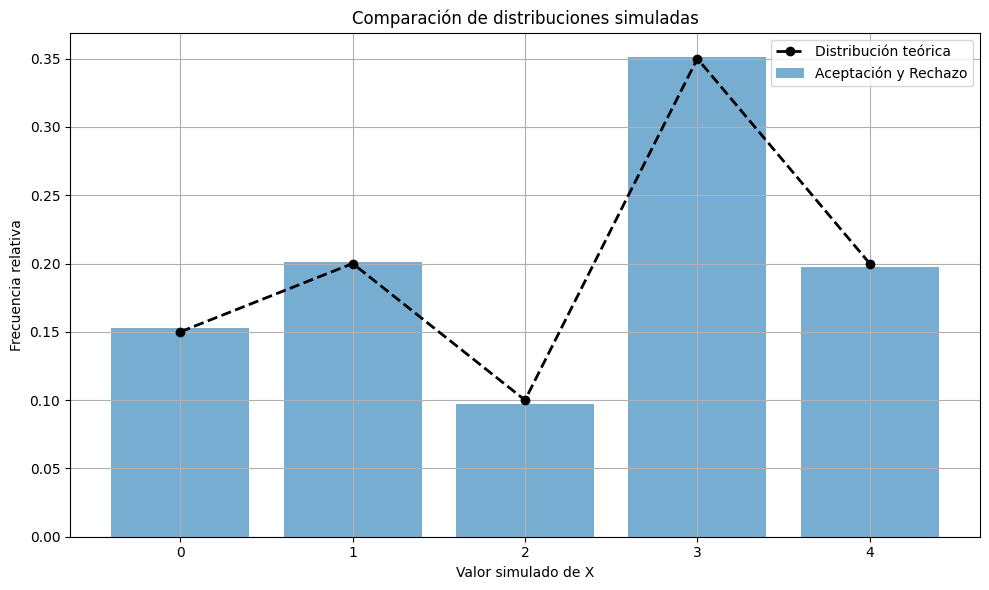

In [41]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_frecuencias(muestras, label):
    conteos = Counter(muestras)
    xs = sorted(conteos.keys())
    ys = [conteos[x] / len(muestras) for x in xs]
    plt.bar(xs, ys, alpha=0.6, label=label)

# Parámetro de simulación
n_sim = 10000

# Simulación con cada método
#muestras_TIX1 = [TIX1() for _ in range(n_sim)]
#muestras_TIX2 = [TIX2() for _ in range(n_sim)]
muestras_AyR = [AyR2() for _ in range(n_sim)]

# Plot
plt.figure(figsize=(10, 6))
#plot_frecuencias(muestras_TIX1, "Transformada Inversa")
#plot_frecuencias(muestras_TIX2, "T.I. Mejorada")
plot_frecuencias(muestras_AyR, "Aceptación y Rechazo")

# Probabilidades teóricas
plt.plot(range(5), p, 'ko--', label="Distribución teórica", linewidth=2)

plt.xticks(range(5))
plt.xlabel("Valor simulado de X")
plt.ylabel("Frecuencia relativa")
plt.title("Comparación de distribuciones simuladas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ejercicio 7

Estime P(Y > 2) con λ = 10, y 1000 repeticiones para la variable Poisson, simulando con método de transformada inversa común e inversa mejorado.

In [42]:
def Poisson(lambda_):
    u = random()
    i = 0; p = np.exp(-lambda_)
    F = p
    while u >= F:
        i += 1
        p *= lambda_ / i
        F += p
    return i

# Mejoramos el algoritmo comenzando por analizar el valor mas probable. El valor maximo de las probabilidades son los valores cercanos a lambda (lambda_),  asi que comenzamos por el valor l y decrecemos o crecemos si U es mayor o menor a la acumulada
def PoissonMejorado(lambda_):
    p = np.exp(-lambda_); F = p
    for j in range(1, int(lambda_) + 1):
        p *= lambda_ / j
        F += p
    u = random()
    if u >= F:
        j = int(lambda_) + 1
        while u >= F:
            p *= lambda_ / j
            F += p
            j += 1 
        return j
    else:
        j = int(lambda_)
        while u < F:
            F -= p
            p *= j / lambda_
            j -= 1
        return j + 1 
    

def ejercicio7(metodo, lambda_, n=1000):
    conteo = 0
    for _ in range(n):
        y = metodo(lambda_)
        if y > 2:
            conteo += 1
    return conteo / n



start = time.perf_counter()
print("Metodo de transformada inversa de Poisson:", ejercicio7(Poisson, 10))
end = time.perf_counter()
tiempo_total = end - start
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

start = time.perf_counter()
print("Metodo de transformada inversa mejorado de Poisson:", ejercicio7(PoissonMejorado, 10))
end = time.perf_counter()
tiempo_total = end - start
print(f"tiempo total: {tiempo_total:.4f} segundos")
print(f"tiempo promedio: {(tiempo_total / 10000) * 1e6:.2f} µs\n")

Metodo de transformada inversa de Poisson: 0.995
tiempo total: 0.0055 segundos
tiempo promedio: 0.55 µs

Metodo de transformada inversa mejorado de Poisson: 0.997
tiempo total: 0.0041 segundos
tiempo promedio: 0.41 µs



## Ejercicio 8

$$ P(X = i) = \frac{\frac{\lambda^i}{i!} e^{-\lambda}}{\sum_{j=0}^{k} \frac{\lambda^j}{j!} e^{-\lambda}} $$

Primero haremos el numerador:
$$\frac{\lambda^i}{i!} e^{-\lambda}$$

In [43]:
def numerador(lamb, i):
    """
    P(Y=i), es la funcion de masa de Poisson
    """
    p = np.exp(-lamb)
    for j in range(1, i + 1):
        p *= lamb / j
    return p

Luego el denominador, el cual es una sumatoria
$$\sum_{j=0}^{k} \frac{\lambda^j}{j!} e^{-\lambda}$$


In [44]:
def denominador(lamb, k):
    """
    P(Y<=k), es la funcion de distribucion acumulada de Poisson
    """
    p = np.exp(-lamb)
    F = p
    for j in range(1, k + 1):
        p *= lamb / j
        F += p
    return F

Ahora dividimos el nominador con el denominador

In [45]:
def PX(lamb, k, i):
    """
    P(X=i) (i=1,...,k)
    """
    return numerador(lamb, i) / denominador(lamb, k)

Hacemos ahora los generadores 

In [46]:
def poisson_truncada(lamb, k):
    """
    Con Transformada inversa
    """
    u = random()
    S = denominador(lamb, k)
    i = 0 
    p = np.exp(-lamb) / S
    F = p
    while u >= F:
        i += 1
        p *= lamb / i
        F += p
    return i

def poisson_truncada_mejorada(lamb, k):
    """
    Con transformada inversa mejorada
    """
    S = denominador(lamb, k)
    p = np.exp(-lamb) / S 
    F = p
    for j in range(int(lamb)):
        p *= lamb / j
        F += p
    j = int(lamb)
    u = random()
    if u < F:
        while u < F:
            F -= p
            p *= j / lamb
            j -= 1
        return j + 1
    else:
        while u >= F:
            j += 1
            p *= lamb / j
            F += p
        return j
    
def est_P(X, lamb, k, i, n_sim=100): #P(X>i)
    c = 0
    for _ in range(n_sim):
        x = X(lamb, k)
        if x > i:
            c += 1
    return c / n_sim

Ahora con em metodo de aceptacion y rechazo

In [47]:
def poisson_ayr(lamb, k):
    """
    Aceptación y Rechazo
    """
    y = Poisson(lamb)
    u = random()
    S = denominador(lamb, k)
    c = 1 / S
    qy = numerador(lamb, y)
    while u >= PX(lamb, k, y) / (c * qy):
        y = Poisson(lamb)
        qy = numerador(lamb, y)
        u = random()
    return y

# Como PX(lamb, k, y) / (c * qy) = 1
def poisson_ayr_mej(lamb, k):
    while True:
        y = Poisson(lamb)
        if y <= k:
            return y

Simulaciones:

In [48]:
print("Estimación de P(X>2) con 1000 simulaciones")
print(f"T. Inversa: {est_P(poisson_truncada, 0.7, 10, 2, n_sim=1000)}")
print(f"T. Inversa MEJORADA: {est_P(poisson_truncada_mejorada, 0.7, 10, 2, n_sim=1000)}" )
print("----------------------------------------------------------------------------------------")
print(f"Estimación usando Aceptación y Rechazo: {est_P(poisson_ayr, 0.7, 10, 2, n_sim=1000)}")
print(f"Método Mejorado: {est_P(poisson_ayr, 0.7, 10, 2, n_sim=1000)}")
print("----------------------------------------------------------------------------------------")
print(f"Valor exacto P(X > 2) = {1 - (PX(0.7, k=10, i=0) + PX(0.7, k=10, i=1) + PX(0.7, k=10, i=2))}")

# Si quiero comparar el tiempo de corrida de las distintas funciones de Transf Inversa
print("----------------------------------------------------------------------------------------")
start = time.time()
est_P(poisson_truncada, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida comun: {time.time() - start:.5f}")
start = time.time()
est_P(poisson_truncada_mejorada, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida mejorada: {time.time() - start:.5f}")
start = time.time()
est_P(poisson_ayr, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida AyR: {time.time() - start:.5f}")
start = time.time()
est_P(poisson_ayr_mej, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida AyR mejorada: {time.time() - start:.5f}")

Estimación de P(X>2) con 1000 simulaciones
T. Inversa: 0.023
T. Inversa MEJORADA: 0.036
----------------------------------------------------------------------------------------
Estimación usando Aceptación y Rechazo: 0.029
Método Mejorado: 0.037
----------------------------------------------------------------------------------------
Valor exacto P(X > 2) = 0.03414158387347266
----------------------------------------------------------------------------------------
Tiempo de corrida comun: 0.03694
Tiempo de corrida mejorada: 0.04018
Tiempo de corrida AyR: 0.08615
Tiempo de corrida AyR mejorada: 0.01167


## Ejercicio 9

Implemente dos métodos para simular una variable geométrica Geom(p):

In [ ]:
# a) Usando transformada inversa y aplicando la fórmula recursiva para P(X = i).

def geomentrica(p):
    """
    Generador de variable aleatoria Geometrica
    """
    u = random()
    i = 1
    p_i = p
    F = p_i
    while u >= F:
        i += 1
        p_i *= (1 - p)  
        F += p_i 
    return i

def geomentrica_mejorada(p):
    """
    Generador de variable aleatoria Geometrica mejorada
    """
    u = random()
    return int(np.log(1-u) / np.log(1-p)) + 1

# Ambas funciones devuelven la cantidad de intentos hasta obtner el primer éxito (mientras mas alto sea p menos intentos son necesarios).

In [50]:
# b) Simulando ensayos con probabilidad de éxito p hasta obtener un éxito

def obtener_exito(p):
    u = random()
    i = 1
    while u >= p:
        i += 1
        u = random()
    return i
    
print(obtener_exito(0.8))

1


In [51]:
"""
Compare la eficiencia de estos algoritmos para p = 0,8 y para p = 0,2.
Para cada caso, realice 10000 simulaciones y calcule el promedio de los valores obtenidos. Comparar estos valores con el valor esperado de la distribución correspondiente. Si están alejados, revisar el código
"""
res_geom_0_8 = []
res_obt_exito_0_8 = []
res_geom_0_2 = []
res_obt_exito_0_2 = []
for _ in range(10000):
    res_geom_0_8.append(geomentrica_mejorada(0.8))
    res_obt_exito_0_8.append(obtener_exito(0.8))
    res_geom_0_2.append(geomentrica_mejorada(0.2))
    res_obt_exito_0_2.append(obtener_exito(0.2))
    
prom_geom_0_8 = np.mean(res_geom_0_8)
prom_obt_exito_0_8 = np.mean(res_obt_exito_0_8)
prom_geom_0_2 = np.mean(res_geom_0_2)
prom_obt_exito_0_2 = np.mean(res_obt_exito_0_2)
print("Promedio geométrica p=0.8:", prom_geom_0_8)
print("Promedio obtención de éxito p=0.8:", prom_obt_exito_0_8)
print("----------------------------------------------------------------------------------------")
print("Promedio geométrica p=0.2:", prom_geom_0_2)
print("Promedio obtención de éxito p=0.2:", prom_obt_exito_0_2)


Promedio geométrica p=0.8: 1.2458
Promedio obtención de éxito p=0.8: 1.2498
----------------------------------------------------------------------------------------
Promedio geométrica p=0.2: 5.0348
Promedio obtención de éxito p=0.2: 4.9907


# Ejercicio 10

- a) Desarrolle un método para generar una variable aleatoria X cuya distribución de probabilidad está dada por:  
$$ P(X = j) = \left( \frac{1}{2} \right)^{j+1} + \frac{\left( \frac{1}{2} \right) 2^{j-1}}{3^j} $$  
Para $j = 1,2,...$
- b) Estime E(X) con 1000 repeticiones y compare con la esperanza exacta

In [ ]:
def funcion10(j):
    return (1/2) ** (j+1) + ((1/2) * np.power(2.0,j-1)) / np.power(3.0,j)

def ejercicio10():
    u = random()
    j = 1
    F = funcion10(j)
    while u >= F:
        j += 1
        F += funcion10(j)
    return j

"""
Me di cuenta que si lo veo como una funcion recursiva, me queda
P(X = j) = p_1(j) + p_2(j),             donde p_1(j) = (1/2)**(j+1)     y     p_2(j) = ((1/2) * 2**(j-1)) / 3**j
por lo tanto p_1(1) = (1/2)**(1+1) = (1/2)**(2) = 1/4     y     p_2(1) = ((1/2) * 2**(1-1)) / 3**1 = (1/2) / 3 = 1/6
p_1(i+1) = (1/2)**(i+1+1) = (1/2)**(i+1) * 1/2 = p_1(i) * 1/2 
p_2(i+1) = ((1/2) * 2**(i+1-1)) / 3**(i+1) = ((1/2) * 2**(i-1) * 2) / (3**i * 3) = p_2(i) * 2/3
"""

def ejercicio10Mejorado():
    u = random()
    j = 1
    p_1 = 1/4
    p_2 = 1/6
    F = p_1 + p_2
    while u >= F:
        j += 1
        p_1 *= (1 / 2)
        p_2 *= (2 / 3)
        F += p_1 + p_2
    return j

In [69]:
# b)
res = []
res_mejorado = []
#sum_teorica = 0
for j in range(10000):
    #sum_teorica += j * funcion10(j) da 2.4999999999999987
    res.append(ejercicio10())
    res_mejorado.append(ejercicio10Mejorado())
prom = np.mean(res)
prom_mej = np.mean(res_mejorado)

print("Promedio o esperanza del ejercicio 10:", prom)
print("Promedio o esperanza del ejercicio 10 mejorado:", prom_mej)
print("Esperanza teorica del ejercicio 10:", 2.4999999999999987)

Promedio o esperanza del ejercicio 10: 2.5009
Promedio o esperanza del ejercicio 10 mejorado: 2.5297
Esperanza teorica del ejercicio 10: 2.4999999999999987


## Ejercicio 12

In [54]:
def queDevuelve(p1, p2):
    X = int(np.log(1-random()) / np.log(1-p1)) + 1
    Y = int(np.log(1-random()) / np.log(1-p2)) + 1
    return min(X, Y)

def queDevuelve2(p):
    return int(np.log(1-random()) / np.log(1-p)) + 1

# Nos pide que p1=0.05 y p2=0.2, calculamos que la probabilidad de Z ~ geom(p) es 0.24

res1 = []
res2 = []
for i in range(10000):
    res1.append(queDevuelve(0.05, 0.2))
    res2.append(queDevuelve2(0.24))
prom1 = np.mean(res1)
prom2 = np.mean(res2)

print("Promedio de la función que devuelve el mínimo de dos geometricas:")
print(prom1)
print("Promedio de la función que devuelve una geométrica con p=0.24:")
print(prom2)
    

Promedio de la función que devuelve el mínimo de dos geometricas:
4.1472
Promedio de la función que devuelve una geométrica con p=0.24:
4.1696


## Resolucion parcialito

In [55]:
probs = [0.05, 0.1, 0.2, 0.3, 0.35]

def generarY():
    u = random()
    F = 1/5
    x = 0
    while u >= F:
        F += 1/5
        x += 1
    return x

def ejercicio1a():
    while True:
        y = generarY()
        u = random()
        if u < 20 * probs[y] / 7:
            return y
       
def ejercicio1b(N):
    sum = 0
    for _ in range(N):
        sum += ejercicio1a()
    return sum/N

print("Valor esperado de AyR:", ejercicio1b(10000))

def ejercicio2a():
    u = random()
    if u < 0.35:
        return 4
    elif u < 0.65:
        return 3
    elif u < 0.85:
        return 2
    elif u < 0.95:
        return 1
    else: return 0
    
    
def ejercicio2b(N):
    sum = 0
    for _ in range(N):
        sum += ejercicio2a()
    return sum/N

print("Valor esperado de TI mejorada:", ejercicio2b(10000))

def esperanzaX():
    i = 0
    e = 0
    for p in probs:
        e += i * p
        i += 1
        
    return e

print("Valor esperado de X:", esperanzaX())



Valor esperado de AyR: 2.808
Valor esperado de TI mejorada: 2.8029
Valor esperado de X: 2.8
